In [1]:
import numpy as np
import pandas as pd
import pyodbc
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ultis.ultis import miss_report, visual_distribution, generate_miss_report, create_gainlift_table
from ultis.connection import conn_206, conn_117

warnings.filterwarnings('ignore')

In [2]:
dfs = []
folder_path = r"D:\AI_project\Tối ưu hoạt động Field"

for filename in os.listdir(folder_path):
    if filename.endswith('.parqet'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_parquet(file_path, engine='pyarrow')
        dfs.append(df)
        
# Gộp tất cả các DataFrame thành một DataFrame duy nhất
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(633878, 303)


,REF_MONTH,CIF,LABEL,RESOLVE_AMT_CIF,OVD_AMT_CURR,DUE_DATE_FINAL_MIN,COLLECTION_LOAN_AMT_REPAY_AMOUNT_SUM_L1M_MLY,DEMO_PROVINCE,COLLECTION_MEET_RESLT_RESOLVE_FINAL_AVG_L3M_MLY,RESOLVE_AMT_CIF_MIN_L3M,...,COLLECTION_MEET_DURS_RPC_CALL_MANUAL_CALL_DUR_MAX_L6M_MLY,COLLECTION_MEET_CNT_TOTAL_TRIAL_CALL_IVM_MAX_L3M_MLY,CC_TXN_AMT_ADB_PURCHASE_STD_L12M_MLY,CASA_BAL_MEDIAN_L3M_DLY,COLLECTION_MEET_CNT_TOTAL_TRIAL_ACTION_AVG_L3M_MLY,CASA_TXN_AMT_OUT_STD_L6M,CASA_BAL_AVG_L3M_DLY,COLLECTION_MEET_CNT_TOTAL_TPC_ACTION_SUM_L1M_MLY,CC_TXN_AMT_ADB_POS_SUM_L6M_MLY,TOTAL_TRIAL_CALL_5S_MIN_L6M
0,202402,10000574,1,479994389.0,1.100173e+08,2024-02-15,NaN,HA NOI,1.000000,479994389.0,...,NaN,67.0,8.894344e+07,0.0,3.000000,8.790611e+05,3.956066e+04,0.0,NaN,0.0
1,202402,10004728,1,131100000.0,0.000000e+00,2024-02-19,4233918.0,PHU YEN,1.000000,95208026.0,...,426.0,0.0,NaN,0.0,10.857143,NaN,2.845128e+05,0.0,NaN,1.0
2,202402,10007948,0,0.0,3.339582e+06,2024-02-05,39139.0,DONG NAI,0.666667,0.0,...,72.0,64.0,4.899720e+06,0.0,14.333333,NaN,1.521371e+05,3.0,18948000.0,10.0
3,202402,1001638,1,823.0,1.323519e+07,2024-02-10,823.0,HA NOI,0.857143,823.0,...,NaN,148.0,9.909790e+07,9347.0,19.142857,4.342776e+06,1.868393e+06,2.0,NaN,19.0
4,202402,10018310,0,0.0,9.589584e+06,2024-02-05,NaN,THAI BINH,0.333333,0.0,...,NaN,29.0,NaN,0.0,25.666667,NaN,7.985275e+02,2.0,NaN,0.0


In [3]:
df['CIF'].nunique()

178187

In [4]:
df['LABEL'].value_counts()

LABEL
1    353863
0    280015
Name: count, dtype: int64

In [11]:
testmonth = '202406'
print('Number of unique values in subset: ',df[df['REF_MONTH']==testmonth]['CIF'].nunique())
print('Number of values in subset: ',len(df[df['REF_MONTH']==testmonth]['CIF']))

Number of unique values in subset:  38369
Number of values in subset:  38369


In [23]:
char = 'OVD'
get_char = [col for col in df.columns if char in col]
get_char

['OVD_AMT_CURR',
 'LOAN_LOAN_ADB_OVD_DAYS_STD_L3M_MLY',
 'LOAN_LOAN_ADB_OVD_DAYS_MAX_L1M_MLY',
 'LOAN_LOAN_EOM_OVD_AMT_MIN_L1M_MLY',
 'OVD_AMT_CURR_STD_L3M',
 'LOAN_SL_ADB_OVD_AMT_AVG_L1M_MLY',
 'OVD_AMT_CURR_MEAN_L3M',
 'LOAN_LOAN_ADB_OVD_DAYS_STD_L6M_MLY',
 'MAX_OVD_MAX_L3M',
 'OVD_AMT_CURR_STD_L6M',
 'LOAN_LOAN_EOM_OVD_DAYS_STD_L3M_MLY',
 'LOAN_SL_EOM_OVD_DAYS_MAX_L1M_MLY',
 'NO_OVD_DAYS_MAX',
 'LOAN_LOAN_ADB_OVD_AMT_MEDIAN_L12M_MLY',
 'LOAN_LOAN_ADB_OVD_DAYS_STD_L12M_MLY',
 'LOAN_LOAN_ADB_OVD_DAYS_MAX_L3M_MLY',
 'MAX_OVD_LARGER_THAN_10',
 'LOAN_SL_ADB_OVD_AMT_STD_L3M_MLY',
 'LOAN_LOAN_ADB_OVD_DAYS_MEDIAN_L12M_MLY',
 'LOAN_LOAN_ADB_OVD_AMT_MIN_L6M_MLY',
 'LOAN_LOAN_ADB_OVD_AMT_MIN_L3M_MLY',
 'LOAN_LOAN_ADB_OVD_DAYS_MAX_L12M_MLY',
 'LOAN_LOAN_ADB_OVD_DAYS_MIN_L6M_MLY',
 'LOAN_LOAN_ADB_OVD_DAYS_MEDIAN_L3M_MLY',
 'MAX_OVD_MIN_L3M',
 'LOAN_LOAN_EOM_OVD_AMT_MIN_L12M_MLY',
 'OVD_AMT_CURR_MEAN_L6M',
 'LOAN_LOAN_ADB_OVD_DAYS_MIN_L3M_MLY',
 'LOAN_UPL_ADB_OVD_DAYS_MEDIAN_L12M_MLY',
 'LOAN_LOA

   REF_MONTH     NO    YES   percent
17    202406  12726  25643  2.015009
16    202405  12046  24703  2.050722
15    202404  16692  24887  1.490954
14    202403  15837  26168  1.652333
13    202402  17165  27713  1.614506
12    202401  16440  22373  1.360888
11    202312  17028  19888  1.167959
10    202311  14516  20966  1.444337
9     202310  16189  18615  1.149855
8     202309  15945  18289  1.147005
7     202308  17378  15959  0.918345
6     202307  18706  14472  0.773656
5     202306  16826  14873  0.883930
4     202305  14874  15284  1.027565
3     202304  14552  15033  1.033054
2     202303  15848  15032  0.948511
1     202302  13774  16514  1.198926
0     202301  13473  17451  1.295257


<Axes: xlabel='REF_MONTH'>

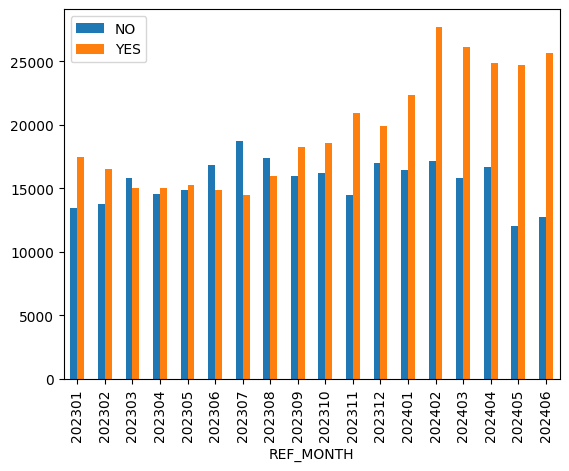

In [15]:
visual_distribution(df,'REF_MONTH','LABEL','REF_MONTH')

# => Kha nang thu no qua FV co xu huong tang trong nam nay

   DEMO_VIETNAMESE_ZODIAC     NO    YES   percent
5                     NGO  22164  28506  1.286140
4                     MUI  21747  27931  1.284361
2                     HOI  24236  30894  1.274715
8                    THIN  23087  29417  1.274180
0                     DAN  22348  28440  1.272597
1                     DAU  22716  28894  1.271967
10                     TY  45992  58398  1.269743
7                    THAN  22132  27571  1.245753
6                     SUU  23659  29461  1.245234
9                    TUAT  24456  30320  1.239778
3                     MAO  23521  29135  1.238680


<Axes: xlabel='DEMO_VIETNAMESE_ZODIAC'>

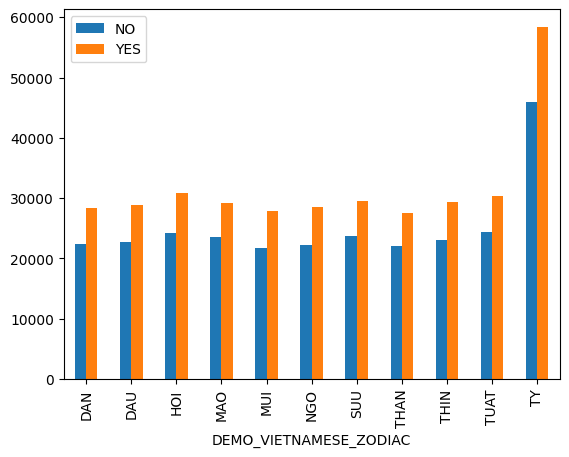

In [7]:
visual_distribution(df,'DEMO_VIETNAMESE_ZODIAC','LABEL')

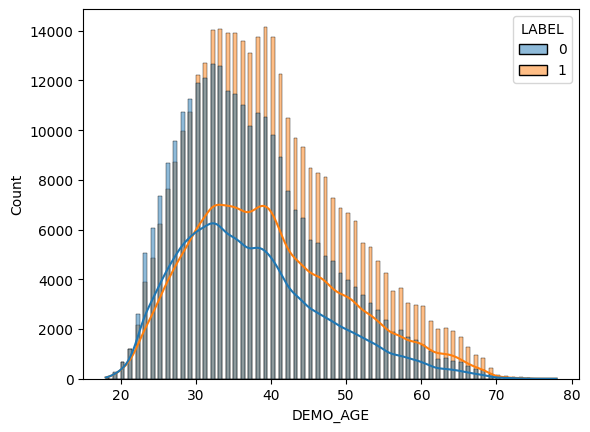

In [11]:
sns.histplot(df,x='DEMO_AGE',hue='LABEL',kde=True, bins=100, binwidth=0.5, log_scale=False)
plt.show()

# => KH truoc 30 tuoi KHO di FV hon KH tren 30 tuoi

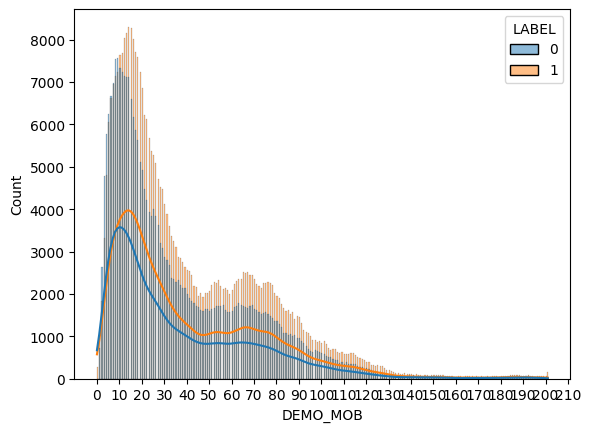

In [22]:
sns.histplot(df,x='DEMO_MOB',hue='LABEL',kde=True, bins=100, binwidth=0.5, log_scale=False)
x_ticks = np.arange(0, df['DEMO_MOB'].max() + 10, 10)  # Thay đổi bước tăng nếu cần
plt.xticks(ticks=x_ticks)
plt.show()

# => month on bank < 10M thi KHO di FV hon

       DEMO_PROVINCE     NO    YES   percent
13         THANH HOA   7619  13614  1.786849
14  THUA THIEN - HUE   4314   7641  1.771210
12         THAI BINH   4133   6611  1.599564
7          HAI DUONG   4391   6895  1.570257
11          NAM DINH   5137   8018  1.560833
4            DA NANG   5346   8324  1.557052
10           LONG AN   3995   5805  1.453066
0           AN GIANG   4090   5881  1.437897
1          BAC GIANG   6024   8450  1.402722
2           BAC NINH   5658   7607  1.344468
8          HAI PHONG   8213   9689  1.179715
6             HA NOI  52066  60216  1.156532
3         BINH DUONG   7936   8039  1.012979
5           DONG NAI   8666   8672  1.000692
9        HO CHI MINH  62743  56316  0.897566


<Axes: xlabel='DEMO_PROVINCE'>

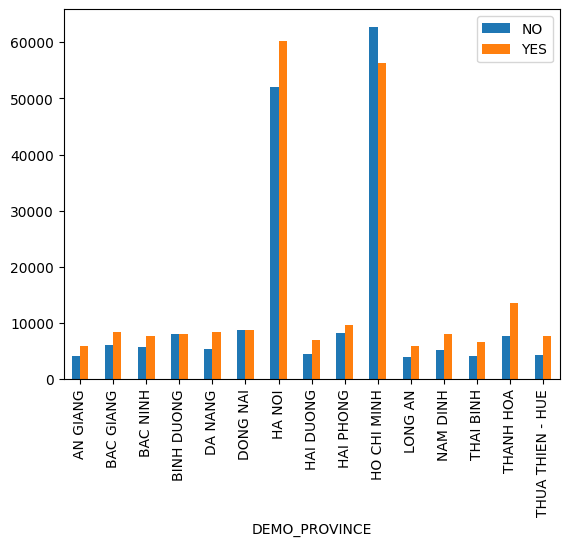

In [40]:
# PROVINCE:
province = list(df['DEMO_PROVINCE'].value_counts(ascending=False).head(15).index)
pivot = df[df['DEMO_PROVINCE'].isin(province)][['DEMO_PROVINCE','LABEL']].pivot_table(index='DEMO_PROVINCE', columns='LABEL', aggfunc='size').reset_index()
pivot.columns = ['DEMO_PROVINCE','NO','YES']
pivot['percent'] = pivot['YES'] / pivot['NO']
print(pivot.sort_values(by='percent', ascending=False))
pivot.plot(x='DEMO_PROVINCE', y=['NO','YES'], kind='bar')

# => Thanh Hoa + Hue co ty le THN qua FV cao
# => HCM thu no qua FV KEM

In [ ]:
thanhhoa = df[df['DEMO_PROVINCE']=='THANH HOA']
thanhhoa

  EOM_BUCKET_CIF     NO     YES   percent
0            B00  17989  133446  7.418200
1            B01  77823   97990  1.259139
3            B03  81701   76872  0.940894
2            B02  99638   41678  0.418294
4            B04    742     185  0.249326


<Axes: xlabel='EOM_BUCKET_CIF'>

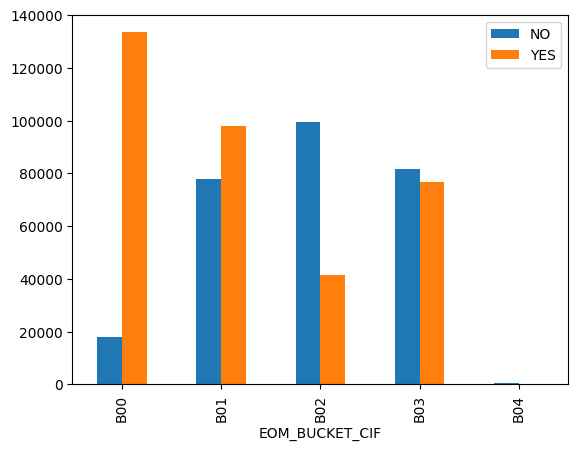

In [42]:
visual_distribution(df,'EOM_BUCKET_CIF','LABEL')

# => chu yeu thu duoc FV tai BO, trong do tap trung tai DPD < 15 (nhu chart ben duoi)

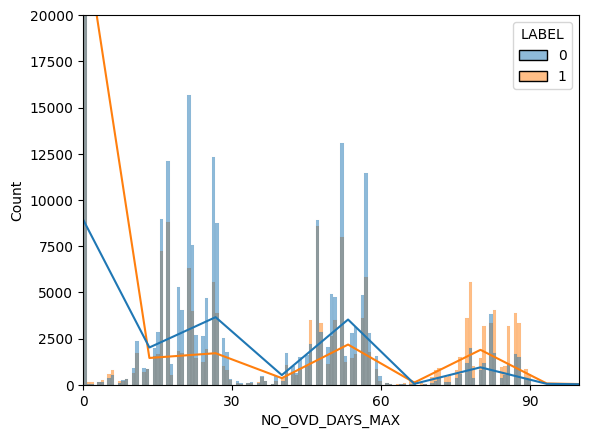

In [30]:
sns.histplot(df,x='NO_OVD_DAYS_MAX',hue='LABEL',kde=True, bins=100, binwidth=0.7, log_scale=False)
plt.xlim(left=0, right=100)
plt.ylim(bottom=0, top=20000)
x_ticks = np.arange(0, 100, 30)  # Thay đổi bước tăng nếu cần
plt.xticks(ticks=x_ticks)
plt.show()

# => OVD day max < 15 days & OVD day max tu 65-90 days co kha nang di FV CAO

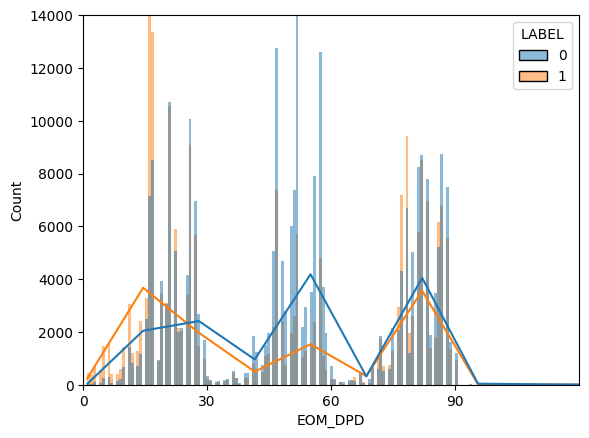

In [39]:
sns.histplot(df,x='EOM_DPD',hue='LABEL',kde=True, bins=100, binwidth=0.7, log_scale=False)
plt.xlim(left=0, right=120)
plt.ylim(bottom=0, top=14000)
x_ticks = np.arange(0, 100, 30)  # Thay đổi bước tăng nếu cần
plt.xticks(ticks=x_ticks)
plt.show()

# => DPD tai EOM thuoc B1 (<25 days) co kha nang FV CAO

### Check model result

In [4]:
# load backtest from anh Tuan
data = pd.read_excel(r"C:/Users/hanbv/Downloads/backtest_202409 1.xlsx",engine='openpyxl',dtype={'cif':str,'respbl':float,'repayment':float,'SCORE':float})
data

,ref_month,cif,respbl,repayment,SCORE,LABEL,cut,Thực tế,setA,setBottom
0,202408,10232825,3.425039e+08,9879834.0,0.992134,1,1,0,1,0
1,202408,8335759,1.696535e+07,2000000.0,0.992039,1,1,0,1,0
2,202408,6224121,5.603356e+07,6372445.0,0.991528,1,1,0,1,0
3,202408,10099461,1.598331e+08,1173945.0,0.991021,1,1,1,1,0
4,202408,7563905,9.818948e+07,9999999.0,0.988642,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
57145,202408,9514950,3.403810e+08,0.0,0.014215,0,20,0,0,1
57146,202408,8774623,1.586025e+08,0.0,0.014213,0,20,0,0,1
57147,202408,9172251,1.597052e+08,0.0,0.014208,0,20,0,0,1
57148,202408,9956506,1.998461e+08,0.0,0.014205,0,20,1,0,1


In [7]:
# load data resolve amt from db
query = r"""
    select distinct customer_id as cif, sum(total_repay_cbql_fn) Repay_Amt
    from [ps1biccapp07].LCC_rp.dbo.[payment_tinchap_202409] 
    group by customer_id
"""
resolve = pd.read_sql(query, con=conn_206(),dtype={'cif':str,'Repay_Amt':float})
resolve

,cif,Repay_Amt
0,10197054,1.980000e+06
1,1107989,1.000000e+07
2,7093422,5.000002e+06
3,882800,1.409321e+08
4,8665048,4.493400e+07
...,...,...
6496,3290244,9.000000e+05
6497,3608930,3.619480e+06
6498,1761187,1.500000e+06
6499,6407242,3.000002e+06
